In [25]:
# Install necessary libraries
!pip install ucimlrepo scikit-learn pandas numpy matplotlib seaborn

In [26]:
# Import libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Fetch the Bank Marketing dataset
bank_marketing = fetch_ucirepo(id=222)

In [29]:
# Extract features and target variable
X = bank_marketing.data.features
y = bank_marketing.data.targets

In [30]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [31]:
# Display metadata
print("Dataset Metadata:")
print(bank_marketing.metadata)

# Display variable information
print("\nVariable Information:")
print(bank_marketing.variables)

Dataset Metadata:
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approac

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Predict on the test set
y_pred = clf.predict(X_test)


Confusion Matrix:
[[7352  633]
 [ 573  485]]


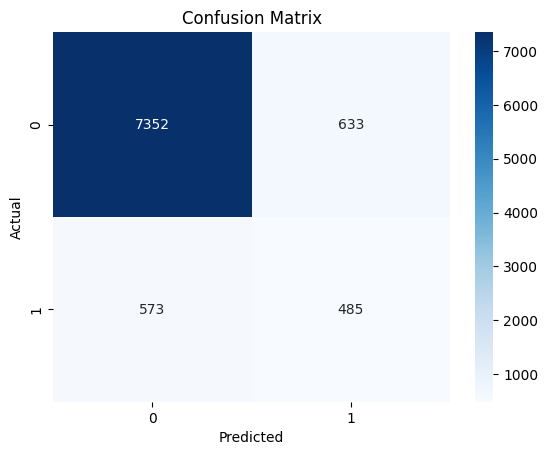


Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.92      0.92      7985
         yes       0.43      0.46      0.45      1058

    accuracy                           0.87      9043
   macro avg       0.68      0.69      0.68      9043
weighted avg       0.87      0.87      0.87      9043

Accuracy: 0.87


In [35]:
# Evaluate the model
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

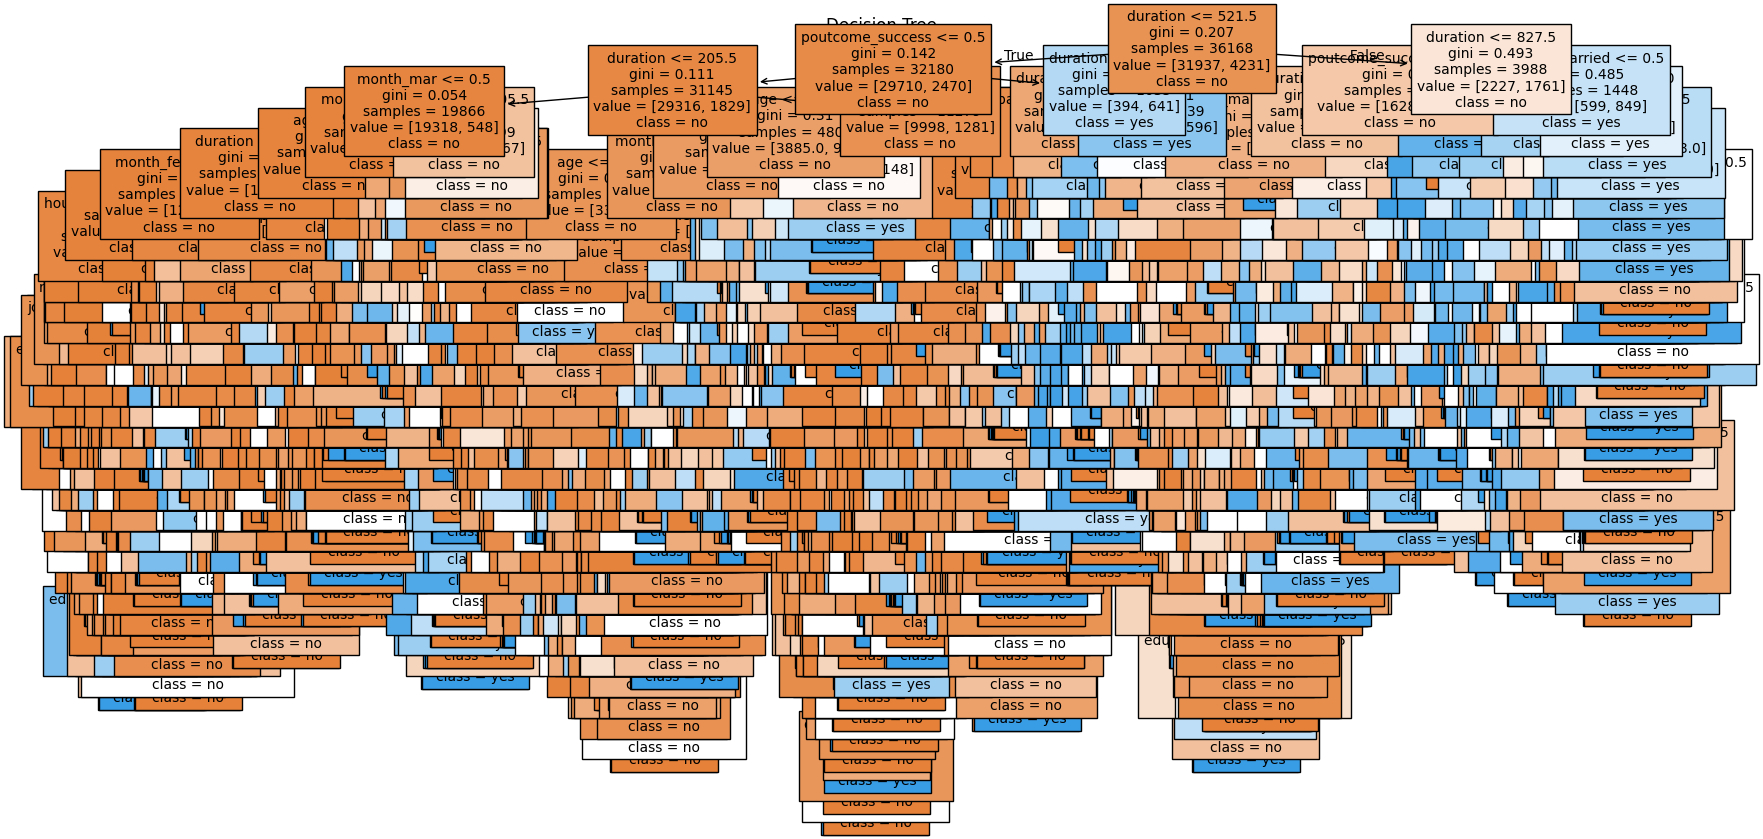

In [36]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=10)
plt.title("Decision Tree")
plt.show()